# Análise de Dados Públicos - Docentes portadores de deficiência - Educação Superior de 2017



In [12]:
import pandas as pd
low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
import numpy as np

import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('microdados_educacao_superior_2017/Microdados_Educacao_Superior_2017/DADOS/DM_DOCENTE/DM_DOCENTE.CSV', delimiter = '|', encoding='iso-8859-1', 
                 usecols=['CO_DOCENTE', 
                          'TP_ESCOLARIDADE',
                          'TP_SEXO',
                          'NU_IDADE',
                          'TP_DEFICIENCIA',
                          'IN_DEFICIENCIA_CEGUEIRA',
                          'IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_SURDEZ',
                          'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MULTIPLA',
                          'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_INTELECTUAL'
])

In [37]:
df 

,CO_DOCENTE,TP_ESCOLARIDADE,TP_SEXO,NU_IDADE,TP_DEFICIENCIA,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_INTELECTUAL
0,118988178830,4,1,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118988178831,4,2,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118988178841,5,2,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,118988178842,3,2,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,118988178843,3,1,45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
392031,118988066394,4,2,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392032,45169,5,1,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392033,118988066395,3,2,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392034,118988066395,2,2,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.count() 

CO_DOCENTE                      392036
TP_ESCOLARIDADE                 392036
TP_SEXO                         392036
NU_IDADE                        392036
TP_DEFICIENCIA                  392036
IN_DEFICIENCIA_CEGUEIRA           1973
IN_DEFICIENCIA_BAIXA_VISAO        1973
IN_DEFICIENCIA_SURDEZ             1973
IN_DEFICIENCIA_FISICA             1973
IN_DEFICIENCIA_SURDOCEGUEIRA      1973
IN_DEFICIENCIA_MULTIPLA           1973
IN_DEFICIENCIA_INTELECTUAL        1973
dtype: int64

In [39]:
df.query('IN_DEFICIENCIA_SURDEZ == 1').count() #docentes com surdez

CO_DOCENTE                      141
TP_ESCOLARIDADE                 141
TP_SEXO                         141
NU_IDADE                        141
TP_DEFICIENCIA                  141
IN_DEFICIENCIA_CEGUEIRA         141
IN_DEFICIENCIA_BAIXA_VISAO      141
IN_DEFICIENCIA_SURDEZ           141
IN_DEFICIENCIA_FISICA           141
IN_DEFICIENCIA_SURDOCEGUEIRA    141
IN_DEFICIENCIA_MULTIPLA         141
IN_DEFICIENCIA_INTELECTUAL      141
dtype: int64

In [40]:
df.query('IN_DEFICIENCIA_FISICA == 1').count() #docentes com deficiência física

CO_DOCENTE                      918
TP_ESCOLARIDADE                 918
TP_SEXO                         918
NU_IDADE                        918
TP_DEFICIENCIA                  918
IN_DEFICIENCIA_CEGUEIRA         918
IN_DEFICIENCIA_BAIXA_VISAO      918
IN_DEFICIENCIA_SURDEZ           918
IN_DEFICIENCIA_FISICA           918
IN_DEFICIENCIA_SURDOCEGUEIRA    918
IN_DEFICIENCIA_MULTIPLA         918
IN_DEFICIENCIA_INTELECTUAL      918
dtype: int64

In [41]:
df.query('IN_DEFICIENCIA_BAIXA_VISAO == 1').count() #docentes com baixa visão

CO_DOCENTE                      502
TP_ESCOLARIDADE                 502
TP_SEXO                         502
NU_IDADE                        502
TP_DEFICIENCIA                  502
IN_DEFICIENCIA_CEGUEIRA         502
IN_DEFICIENCIA_BAIXA_VISAO      502
IN_DEFICIENCIA_SURDEZ           502
IN_DEFICIENCIA_FISICA           502
IN_DEFICIENCIA_SURDOCEGUEIRA    502
IN_DEFICIENCIA_MULTIPLA         502
IN_DEFICIENCIA_INTELECTUAL      502
dtype: int64

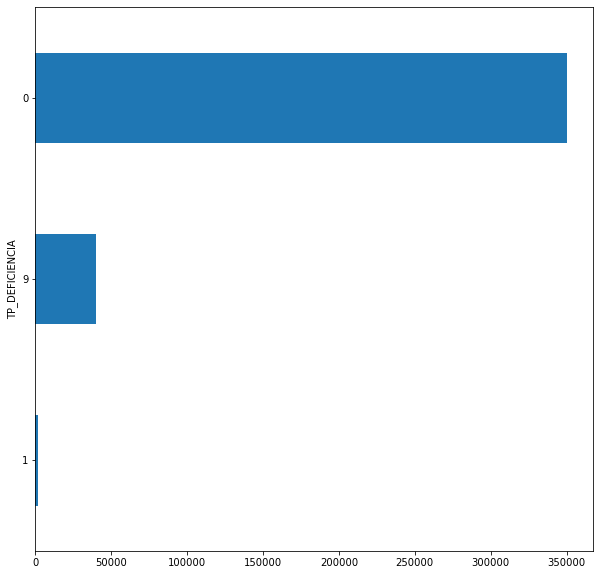

In [43]:
df.groupby('TP_DEFICIENCIA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))
# (0) - Não (9)- Não dispõe de informação (1)- Sim

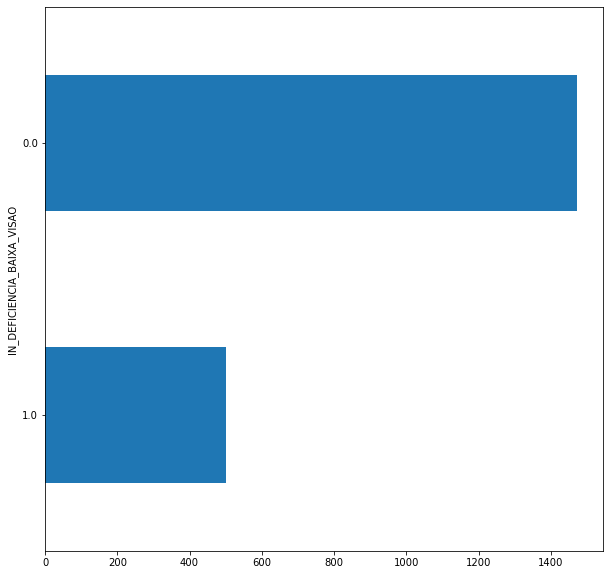

In [45]:
df.groupby('IN_DEFICIENCIA_BAIXA_VISAO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))
# (0)- Não (1)- Sim 

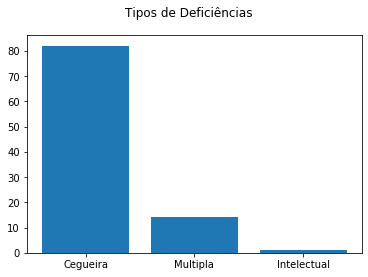

In [52]:
plt.suptitle("Tipos de Deficiências")
names = ['Cegueira','Multipla', 'Intelectual']
values = [
    df.query('IN_DEFICIENCIA_CEGUEIRA == 1').count()[0],
    df.query('IN_DEFICIENCIA_MULTIPLA == 1').count()[0],
    df.query('IN_DEFICIENCIA_INTELECTUAL == 1').count()[0]
]
plt.bar(names, values)
plt.show()